<a href="https://colab.research.google.com/github/aarohishaiva/Singapore_Resale_project5/blob/main/Singapore_Resale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [21]:
df1 = pd.read_csv("/content/drive/MyDrive/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2 = pd.read_csv("/content/drive/MyDrive/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")
df3 = pd.read_csv("/content/drive/MyDrive/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv")
df4 = pd.read_csv("/content/drive/MyDrive/ResaleflatpricesbasedonregistrationdatefromJan2017onwards (2).csv")
df5 = pd.read_csv("/content/drive/MyDrive/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [22]:
#Checking the head
print(df1.head)
print(df2.head)
print(df3.head)
print(df4.head)
print(df5.head)

<bound method NDFrame.head of           month        town  flat_type block       street_name storey_range  \
0       2000-01  ANG MO KIO     3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1       2000-01  ANG MO KIO     3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2       2000-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3       2000-01  ANG MO KIO     3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4       2000-01  ANG MO KIO     3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   
...         ...         ...        ...   ...               ...          ...   
369646  2012-02      YISHUN     5 ROOM   212      YISHUN ST 21     10 TO 12   
369647  2012-02      YISHUN     5 ROOM   758      YISHUN ST 72     01 TO 03   
369648  2012-02      YISHUN     5 ROOM   873      YISHUN ST 81     01 TO 03   
369649  2012-02      YISHUN  EXECUTIVE   664      YISHUN AVE 4     07 TO 09   
369650  2012-02      YISHUN  EXECUTIVE   293      YISHUN ST 22     04 TO 06   

        floor_area_sq

In [23]:
#Merging all the dataframes
df = pd.concat([df1, df2, df3, df4, df5])

In [24]:
#Checking Columns and head
print(df.head(5))

     month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            69.0        Improved                 1986      147000.0   
1            61.0        Improved                 1986      144000.0   
2            73.0  New Generation                 1976      159000.0   
3            73.0  New Generation                 1976      167000.0   
4            67.0  New Generation                 1976      163000.0   

  remaining_lease  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


In [25]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824453 entries, 0 to 182722
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                824453 non-null  object 
 1   town                 824453 non-null  object 
 2   flat_type            824453 non-null  object 
 3   block                824453 non-null  object 
 4   street_name          824453 non-null  object 
 5   storey_range         824453 non-null  object 
 6   floor_area_sqm       824453 non-null  float64
 7   flat_model           824453 non-null  object 
 8   lease_commence_date  824453 non-null  int64  
 9   resale_price         824453 non-null  float64
 10  remaining_lease      402599 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 75.5+ MB


In [26]:
#Removing the alphanumeric characters from the block column
# Converting the block column to int
df['block'] = df['block'].astype(str)
df['block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))
# Now df['block'] should contain only digits in each element
df['block'] = df['block'].astype(int)

In [27]:
#converting the month column to year and month
df['month'] = pd.to_datetime(df['month'])
#Convert month to year and month
df['year'] = df['month'].apply(lambda i : i.year)
df['month'] = df['month'].apply(lambda i : i.month)

In [28]:
#Summarizing the data
df.describe()

,month,block,floor_area_sqm,lease_commence_date,resale_price,year
count,824453.000000,824453.000000,824453.000000,824453.000000,8.244530e+05,824453.000000
mean,6.511008,364.584373,96.823438,1991.780190,3.960977e+05,2012.949787
std,3.401686,256.588608,24.813796,12.309275,1.778736e+05,7.724732
min,1.000000,1.000000,28.000000,1966.000000,2.800000e+04,2000.000000
25%,4.000000,138.000000,74.000000,1984.000000,2.660000e+05,2006.000000
50%,7.000000,316.000000,95.000000,1989.000000,3.700000e+05,2014.000000
75%,9.000000,555.000000,113.000000,2000.000000,4.920000e+05,2020.000000
max,12.000000,999.000000,297.000000,2020.000000,1.588000e+06,2024.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824453 entries, 0 to 182722
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                824453 non-null  int64  
 1   town                 824453 non-null  object 
 2   flat_type            824453 non-null  object 
 3   block                824453 non-null  int64  
 4   street_name          824453 non-null  object 
 5   storey_range         824453 non-null  object 
 6   floor_area_sqm       824453 non-null  float64
 7   flat_model           824453 non-null  object 
 8   lease_commence_date  824453 non-null  int64  
 9   resale_price         824453 non-null  float64
 10  remaining_lease      402599 non-null  object 
 11  year                 824453 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 81.8+ MB


In [30]:
#Checking for null values
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        421854
year                        0
dtype: int64

In [31]:
#fill the null values suing ML models
df = df.fillna(0)

In [32]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

#saving the data
#df.to_csv('ResaleFlatPrices.csv', index=False

In [34]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,0,2000
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,0,2000
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,0,2000
3,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,0,2000
4,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,0,2000


<ipython-input-35-5d1cf6ecfc79>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['block'])


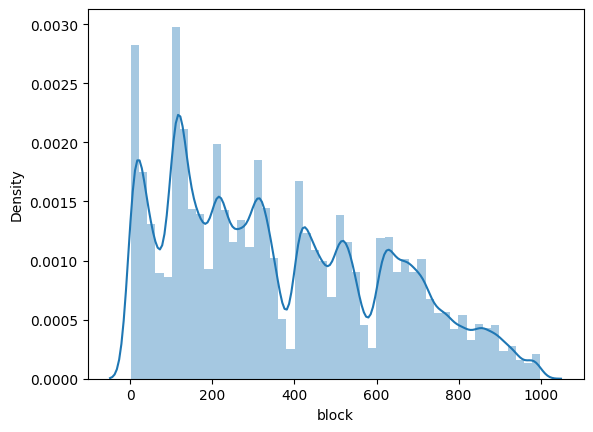

<ipython-input-35-5d1cf6ecfc79>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['floor_area_sqm'])


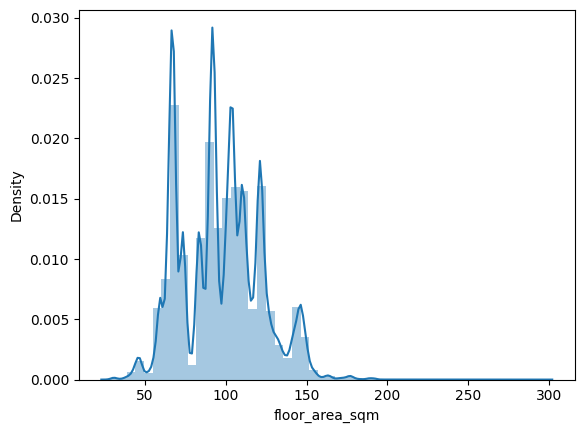

<ipython-input-35-5d1cf6ecfc79>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lease_commence_date'])


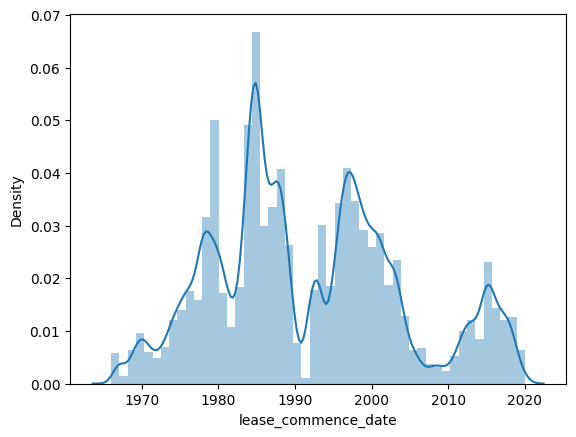

In [35]:
#Checking Distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['block'])
plt.show()
sns.distplot(df['floor_area_sqm'])
plt.show()
sns.distplot(df['lease_commence_date'])
plt.show()

In [36]:
#replacing MULTI-GENERATION with MULTI GENERATION
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI GENERATION', '1 ROOM'], dtype=object)

          flat_type  flat_model
0            1 ROOM           1
1            2 ROOM           6
2            3 ROOM           9
3            4 ROOM          12
4            5 ROOM          11
5         EXECUTIVE           5
6  MULTI GENERATION           1


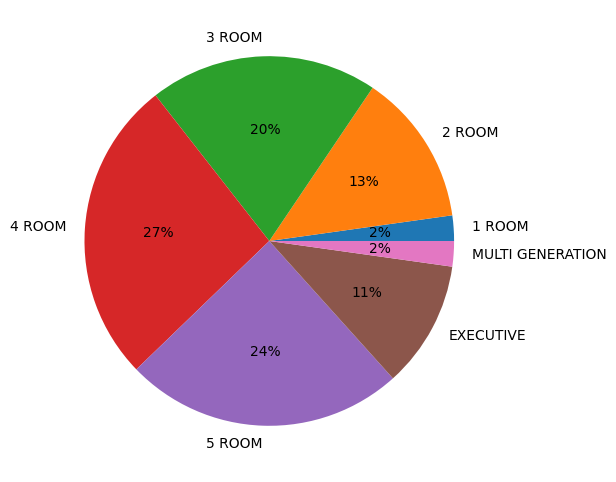

In [37]:
#Checking flat type with respect to flat model
import matplotlib.pyplot as plt
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (12,6))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

<Axes: xlabel='flat_type', ylabel='floor_area_sqm'>

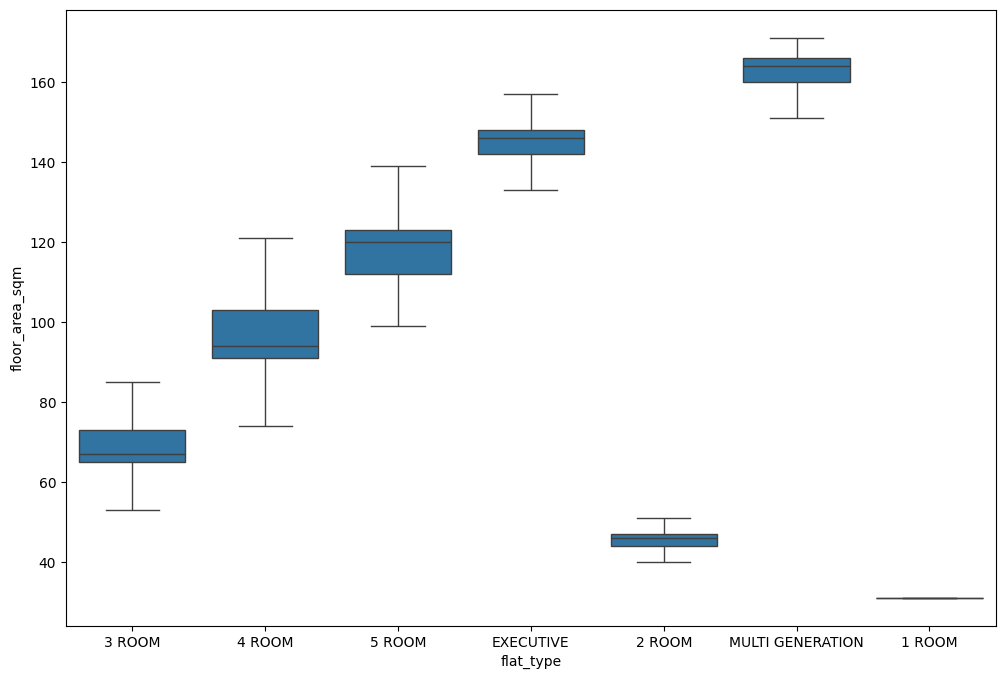

In [38]:
#Checking flat type with respect to floor area
import seaborn as sns
plt.figure(figsize = (12,8))
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)

<Axes: xlabel='flat_type', ylabel='resale_price'>

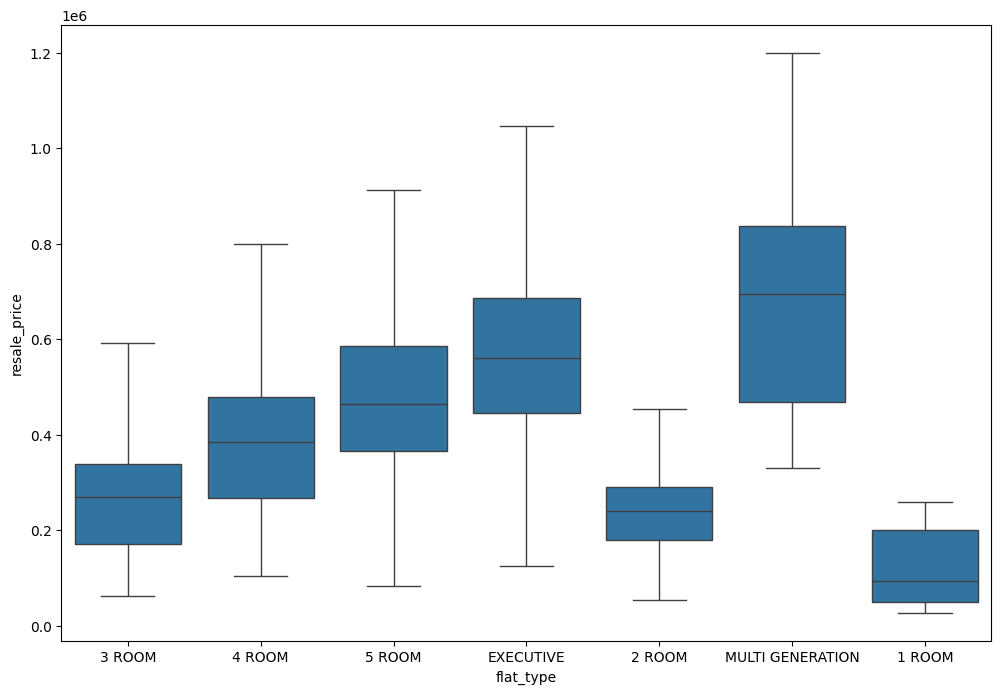

In [39]:
# Distribution of resale_price based on flat_type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'flat_type', y ='resale_price', data = df, showfliers = False)

In [40]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year'],
      dtype='object')

In [41]:
#print all the unique values in category column
print(df['month'].unique())
print("---------------------------------------------------------------")
print(df['year'].unique())
print("---------------------------------------------------------------")
print(df['town'].unique())
print("---------------------------------------------------------------")
print(df['flat_type'].unique())
print("---------------------------------------------------------------")
print(df['storey_range'].unique())
print("---------------------------------------------------------------")
print(df['flat_model'].unique())
print("---------------------------------------------------------------")
df['street_name'].unique()

[ 1  2  3  4  5  6  7  8  9 10 11 12]
---------------------------------------------------------------
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2015
 2016 2013 2014 2017 2018 2019 2020 2021 2022 2023 2024]
---------------------------------------------------------------
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH'
 'WOODLANDS' 'YISHUN' 'SEMBAWANG' 'PUNGGOL']
---------------------------------------------------------------
['3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '2 ROOM' 'MULTI GENERATION'
 '1 ROOM']
---------------------------------------------------------------
['07 TO 09' '04 TO 06' '01 TO 03' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '40 TO 42'
 '37 TO 39' '34 TO 36' '46 TO 48'

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 10',
       'ANG MO KIO AVE 2', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 8', 'ANG MO KIO AVE 9',
       'ANG MO KIO ST 21', 'ANG MO KIO ST 31', 'ANG MO KIO ST 11',
       'BEDOK RESERVOIR RD', 'BEDOK NTH RD', 'BEDOK NTH ST 3',
       'BEDOK STH AVE 1', 'BEDOK STH RD', 'CHAI CHEE AVE',
       'NEW UPP CHANGI RD', 'CHAI CHEE DR', 'CHAI CHEE RD',
       'BEDOK NTH AVE 1', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 1', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK STH AVE 2', 'BEDOK STH AVE 3',
       'CHAI CHEE ST', 'LENGKONG TIGA', 'JLN TENAGA', 'SIN MING RD',
       'SHUNFU RD', 'BISHAN ST 11', 'BISHAN ST 12', 'BISHAN ST 13',
       'SIN MING AVE', 'BISHAN ST 22', 'BISHAN ST 23', 'BISHAN ST 24',
       'BRIGHT HILL DR', 'BT BATOK ST 51', 'BT BATOK ST 52',
       'BT BATOK ST 11', 'BT BATOK ST 21', 'BT BATOK ST 34',
       'BT BATOK WEST AVE 4', 

In [42]:
#append unique values in a list for selection of dropdown in streamlit(front end)
a = '''
town = []
for i in range(len(df['town'].unique())):
  town.append(df['town'].unique()[i])
import json
# Save to a JSON file
with open('town.json', 'w') as file:
    json.dump(town, file)

flat_type = []
for i in range(len(df['flat_type'].unique())):
  flat_type.append(df['flat_type'].unique()[i])
with open('flat_type.json', 'w') as file:
    json.dump(flat_type, file)

street_name = []
for i in range(len(df['street_name'].unique())):
  street_name.append(df['street_name'].unique()[i])
with open('street_name.json', 'w') as file:
    json.dump(street_name, file)


storey_range = []
for i in range(len(df['storey_range'].unique())):
  storey_range.append(df['storey_range'].unique()[i])
with open('storey_range.json', 'w') as file:
    json.dump(storey_range, file)

flat_model = []
for i in range(len(df['flat_model'].unique())):
  flat_model.append(df['flat_model'].unique()[i])
with open('flat_model.json', 'w') as file:
    json.dump(flat_model, file) '''

In [43]:
#sum of unique values
df.nunique()

month                    12
town                     26
flat_type                 7
block                   986
street_name             573
storey_range             25
floor_area_sqm          194
flat_model               21
lease_commence_date      55
resale_price           8222
remaining_lease         727
year                     25
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824453 entries, 0 to 182722
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                824453 non-null  int64  
 1   town                 824453 non-null  object 
 2   flat_type            824453 non-null  object 
 3   block                824453 non-null  int64  
 4   street_name          824453 non-null  object 
 5   storey_range         824453 non-null  object 
 6   floor_area_sqm       824453 non-null  float64
 7   flat_model           824453 non-null  object 
 8   lease_commence_date  824453 non-null  int64  
 9   resale_price         824453 non-null  float64
 10  remaining_lease      824453 non-null  object 
 11  year                 824453 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 81.8+ MB


In [45]:
#converting the category column into numeric using label encoder
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['town']= le1.fit_transform(df['town'])
le2 = LabelEncoder()
df['flat_type']= le2.fit_transform(df['flat_type'])
le3 = LabelEncoder()
df['street_name']= le3.fit_transform(df['street_name'])
le4 = LabelEncoder()
df['storey_range']= le4.fit_transform(df['storey_range'])
le5 = LabelEncoder()
df['flat_model']= le5.fit_transform(df['flat_model'])

In [46]:
#Save all the label encoder in a pickle file
import pickle
#pickle.dump(le1, open('label_encoder1twn.pkl', 'wb'))
#pickle.dump(le2, open('label_encoder2FT.pkl', 'wb'))
#pickle.dump(le3, open('label_encoder3SN.pkl', 'wb'))
#pickle.dump(le4, open('label_encoder4SR.pkl', 'wb'))
#pickle.dump(le5, open('label_encoder5FM.pkl', 'wb'))

In [47]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,2,170,16,4,69.0,5,1986,147000.0,0,2000
1,1,0,2,174,16,2,61.0,5,1986,144000.0,0,2000
2,1,0,2,216,12,4,73.0,12,1976,159000.0,0,2000
3,1,0,2,215,12,4,73.0,12,1976,167000.0,0,2000
4,1,0,2,218,12,4,67.0,12,1976,163000.0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
182718,6,25,5,360,552,4,142.0,3,1988,810000.0,63 years 02 months,2024
182719,6,25,5,723,562,5,146.0,7,1986,790000.0,61 years,2024
182720,6,25,5,826,564,5,146.0,7,1988,1000000.0,62 years 08 months,2024
182721,6,25,5,826,564,2,146.0,7,1988,1000000.0,62 years 08 months,2024


<Axes: >

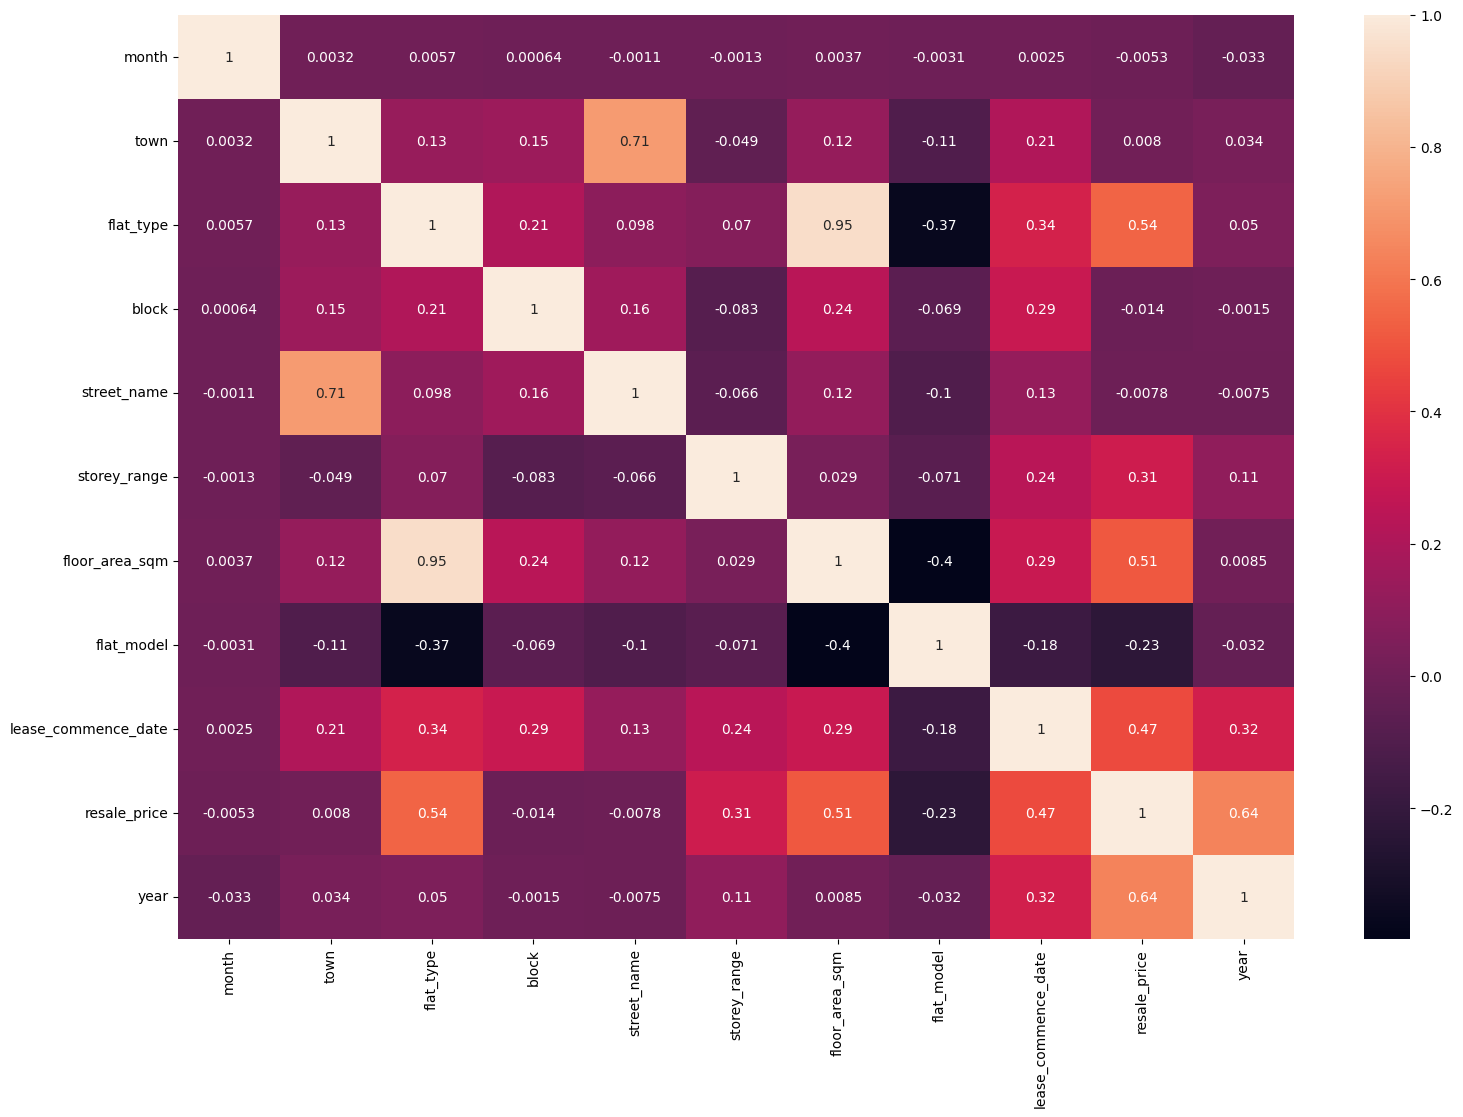

In [48]:
#Correlation
feature_cols = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'year']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824453 entries, 0 to 182722
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                824453 non-null  int64  
 1   town                 824453 non-null  int64  
 2   flat_type            824453 non-null  int64  
 3   block                824453 non-null  int64  
 4   street_name          824453 non-null  int64  
 5   storey_range         824453 non-null  int64  
 6   floor_area_sqm       824453 non-null  float64
 7   flat_model           824453 non-null  int64  
 8   lease_commence_date  824453 non-null  int64  
 9   resale_price         824453 non-null  float64
 10  remaining_lease      824453 non-null  object 
 11  year                 824453 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 81.8+ MB


In [50]:
#describe
df.describe()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
count,824453.000000,824453.000000,824453.000000,824453.000000,824453.000000,824453.000000,824453.000000,824453.000000,824453.000000,8.244530e+05,824453.000000
mean,6.511008,13.679368,3.080361,364.584373,283.519988,3.628694,96.823438,8.796232,1991.780190,3.960977e+05,2012.949787
std,3.401686,8.141824,0.928876,256.588608,174.722480,2.901184,24.813796,3.748846,12.309275,1.778736e+05,7.724732
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,28.000000,0.000000,1966.000000,2.800000e+04,2000.000000
25%,4.000000,7.000000,2.000000,138.000000,125.000000,2.000000,74.000000,5.000000,1984.000000,2.660000e+05,2006.000000
50%,7.000000,13.000000,3.000000,316.000000,276.000000,4.000000,95.000000,8.000000,1989.000000,3.700000e+05,2014.000000
75%,9.000000,22.000000,4.000000,555.000000,448.000000,5.000000,113.000000,12.000000,2000.000000,4.920000e+05,2020.000000
max,12.000000,25.000000,6.000000,999.000000,572.000000,24.000000,297.000000,20.000000,2020.000000,1.588000e+06,2024.000000


In [51]:
from sklearn.model_selection import train_test_split

# Assuming 'resale_price' and 'remaining_lease' are columns to be dropped
columns_to_drop = ['resale_price', 'remaining_lease']
# Separate features (X) and target variable (y)
X = df.drop(columns=columns_to_drop)
y = df['resale_price']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
x_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year
203214,3,21,5,516,413,2,146.0,3,1992,2006
2297,3,25,3,756,563,3,84.0,16,1985,2012
137787,6,22,5,334,453,0,147.0,3,1996,2022
255692,2,24,3,689,530,5,90.0,13,2004,2008
296930,8,22,4,288,450,2,139.0,8,1984,2009
...,...,...,...,...,...,...,...,...,...,...
259178,4,13,3,716,271,5,111.0,8,1991,2008
365838,12,17,4,294,362,4,110.0,13,2003,2011
131932,10,24,4,862,540,4,127.0,5,1996,2003
29425,6,17,3,306,363,5,93.0,13,2012,2018


In [53]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659562 entries, 203214 to 121958
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                659562 non-null  int64  
 1   town                 659562 non-null  int64  
 2   flat_type            659562 non-null  int64  
 3   block                659562 non-null  int64  
 4   street_name          659562 non-null  int64  
 5   storey_range         659562 non-null  int64  
 6   floor_area_sqm       659562 non-null  float64
 7   flat_model           659562 non-null  int64  
 8   lease_commence_date  659562 non-null  int64  
 9   year                 659562 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 55.4 MB


In [54]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [55]:
#Predicting the model
y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 12688.450221336123
Mean Squared Error: 549179981.8384356
R2 Score: 0.9825965791294133


<Axes: xlabel='resale_price'>

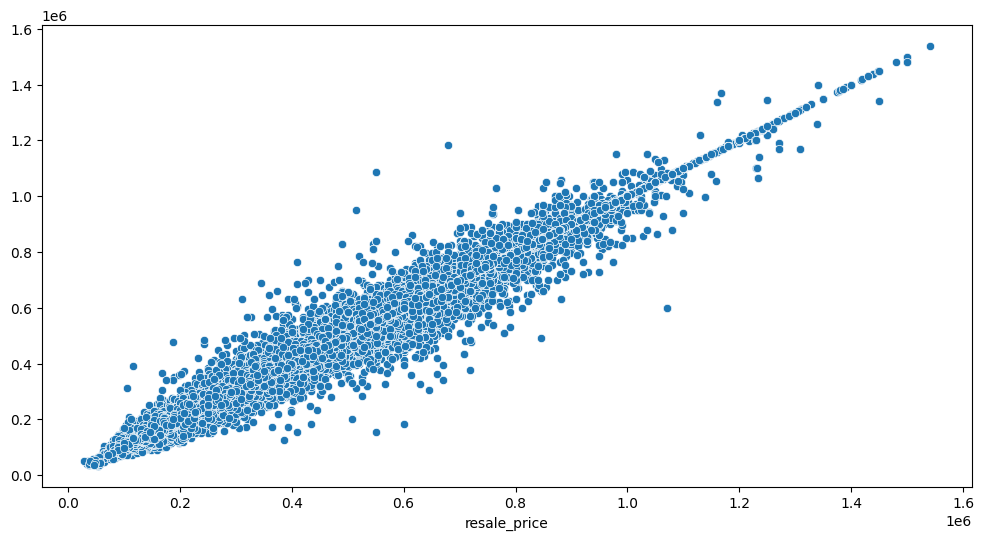

In [56]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [57]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, max_depth=10)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 3069237785.114477
R2 Score: 0.9027363729693105
Mean Absolute Error: 37690.532075532814


<Axes: xlabel='resale_price'>

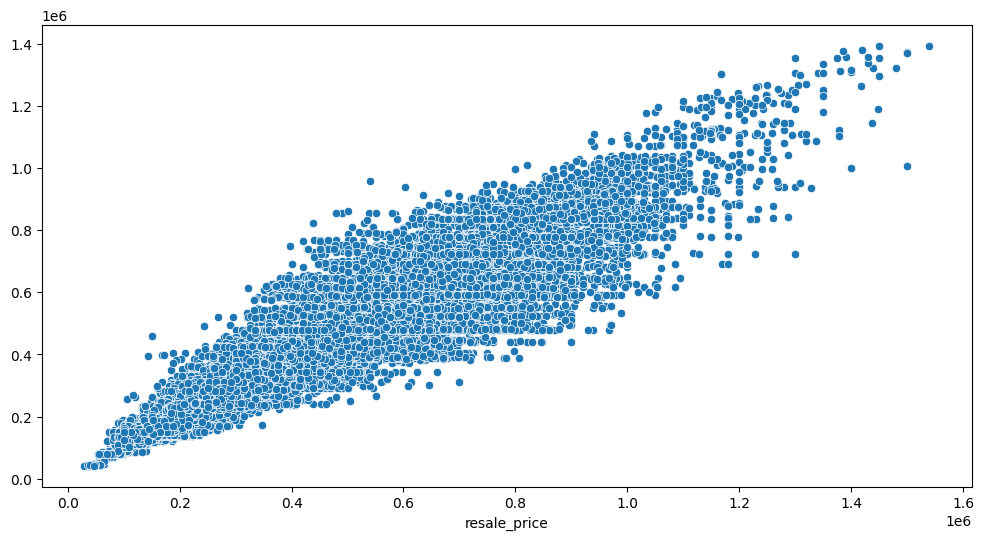

In [58]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [59]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Predict the target variable using the test data
y_pred = lr.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error: 7832265822.511747
Mean Absolute Error: 66921.09194504419
R2 Score: 0.7517968189168551


<Axes: xlabel='resale_price'>

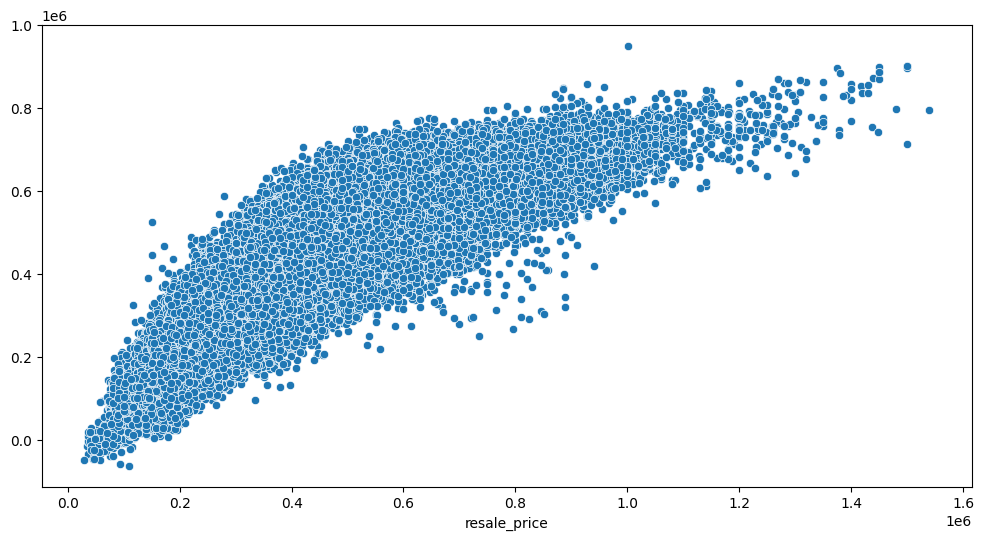

In [60]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [61]:
#Save the model
import pickle

#pickle.dump(lr, open('lr.pkl', 'wb'))

In [62]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,2,170,16,4,69.0,5,1986,147000.0,0,2000
1,1,0,2,174,16,2,61.0,5,1986,144000.0,0,2000
2,1,0,2,216,12,4,73.0,12,1976,159000.0,0,2000
3,1,0,2,215,12,4,73.0,12,1976,167000.0,0,2000
4,1,0,2,218,12,4,67.0,12,1976,163000.0,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
182718,6,25,5,360,552,4,142.0,3,1988,810000.0,63 years 02 months,2024
182719,6,25,5,723,562,5,146.0,7,1986,790000.0,61 years,2024
182720,6,25,5,826,564,5,146.0,7,1988,1000000.0,62 years 08 months,2024
182721,6,25,5,826,564,2,146.0,7,1988,1000000.0,62 years 08 months,2024


In [63]:
#Testing the model
import numpy as np

# Sample data
ns = np.array([[1, 'ANG MO KIO', '2 ROOM', 309, 'ANG MO KIO AVE 1', '10 TO 12', 44, 'Improved', 1977, 2017]])

#columns to encode
en1 = le1.transform(ns[:, [1]])
en2 = le2.transform(ns[:, [2]])
en3 = le3.transform(ns[:, [4]])
en4 = le4.transform(ns[:, [5]])
en5 = le5.transform(ns[:, [7]])

# Convert 1D arrays to 2D arrays
en1 = en1[:, np.newaxis]
en2 = en2[:, np.newaxis]
en3 = en3[:, np.newaxis]
en4 = en4[:, np.newaxis]
en5 = en5[:, np.newaxis]

ns = np.concatenate((ns[:, [0]], en1, en2, ns[:, [3]], en3, en4, ns[:, [6]], en5, ns[:, [8]], ns[:, [9]]), axis=1)

#predict the resale price with the model
resale = dt.predict(ns)
print(f'the resale price is :{resale}')

the resale price is :[250000.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was